In [160]:
import pandas as  pd

import numpy as np

import matplotlib.pyplot as plt


In [161]:
# UPLOADING DATA
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_fa30d206090f4c45beb28cb5540c7194 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sLkurfQzqxAX3kOp7nWKELBH-sC66GkHDJh0CEI7zGvw',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fa30d206090f4c45beb28cb5540c7194.get_object(Bucket='machinelearning-donotdelete-pr-vtlqvcyuvm9np8',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds= pd.read_csv(body)
ds.head()



,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [162]:
ds.isnull().any()

layer_height          False
wall_thickness        False
infill_density        False
infill_pattern        False
nozzle_temperature    False
bed_temperature       False
print_speed           False
material              False
fan_speed             False
roughness             False
tension_strenght      False
elongation            False
dtype: bool

In [163]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

ds=ds.iloc[:,:].values



In [164]:
ds[:,3]=lb.fit_transform(ds[:,3])

ds[:,7]=lb.fit_transform(ds[:,7])

In [165]:
da=pd.DataFrame(ds)

In [166]:
da.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [167]:
y=ds[:,7]

y=y.astype("int")

In [168]:

da.drop(columns=7,inplace=True)


In [169]:
x=da.iloc[:,:].values

x

array([[0.02, 8.0, 90, 0, 220, 60, 40, 0, 25, 18, 1.2],
       [0.02, 7.0, 90, 1, 225, 65, 40, 25, 32, 16, 1.4],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.02, 4.0, 70, 1, 240, 75, 40, 75, 68, 10, 0.5],
       [0.02, 6.0, 90, 0, 250, 80, 40, 100, 92, 5, 0.7],
       [0.02, 10.0, 40, 1, 200, 60, 40, 0, 60, 24, 1.1],
       [0.02, 8.0, 90, 0, 250, 100, 40, 100, 98, 5, 0.95],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.02, 9.0, 70, 0, 215, 75, 40, 75, 24, 27, 1.4],
       [0.02, 8.0, 40, 1, 220, 80, 40, 100, 30, 25, 1.7],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.06, 10.0, 50, 0, 230, 70, 60, 50, 118, 16, 1.3],
       [0.06, 6.0, 10, 1, 240, 75, 60, 75, 200, 9, 0.8],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.06, 10.0, 90, 1, 200, 60, 60, 0, 126, 27, 2.2],
       [0.06, 3.0, 40, 0, 205, 65, 60, 25, 145, 23, 1.9],
       [0.06, 8.0, 30, 1

In [170]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [171]:
# FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()



In [172]:
x_train



array([[0.15, 1.0, 50, 0, 220, 60, 120, 0, 120, 16, 1.5],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.15, 4.0, 50, 0, 220, 60, 60, 0, 168, 27, 2.4],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.1, 1.0, 50, 0, 230, 70, 120, 50, 265, 10, 0.9],
       [0.2, 9.0, 90, 1, 225, 65, 40, 25, 276, 34, 3.1],
       [0.05, 6.0, 10, 1, 245, 75, 85, 75, 205, 5, 0.5],
       [0.15, 6.0, 50, 0, 230, 70, 60, 50, 225, 18, 1.4],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.1, 4.0, 40, 0, 205, 65, 120, 25, 176, 12, 1.2],
       [0.1, 3.0, 50, 1, 210, 70, 120, 50, 128, 18, 1.8],
       [0.1, 4.0, 95, 0, 220, 75, 120, 100, 121, 14, 1.5],
       [0.2, 7.0, 30, 0, 230, 70, 40, 50, 298, 28, 2.2],
       [0.2, 6.0, 90, 1, 240, 75, 40, 75, 360, 28, 1.6],
       [0.06, 12.0, 50, 1, 230, 80, 65, 100, 74, 29, 2.1],
       [0.06, 5.0, 90

In [173]:
x_train


array([[0.15, 1.0, 50, 0, 220, 60, 120, 0, 120, 16, 1.5],
       [0.02, 1.0, 80, 0, 230, 70, 40, 50, 40, 8, 0.8],
       [0.06, 2.0, 20, 1, 225, 65, 60, 25, 92, 12, 1.4],
       [0.15, 4.0, 50, 0, 220, 60, 60, 0, 168, 27, 2.4],
       [0.06, 6.0, 80, 0, 220, 60, 60, 0, 75, 37, 2.4],
       [0.1, 1.0, 50, 0, 230, 70, 120, 50, 265, 10, 0.9],
       [0.2, 9.0, 90, 1, 225, 65, 40, 25, 276, 34, 3.1],
       [0.05, 6.0, 10, 1, 245, 75, 85, 75, 205, 5, 0.5],
       [0.15, 6.0, 50, 0, 230, 70, 60, 50, 225, 18, 1.4],
       [0.02, 10.0, 10, 1, 210, 70, 40, 50, 21, 14, 1.5],
       [0.06, 3.0, 50, 0, 250, 80, 60, 100, 220, 10, 1.0],
       [0.1, 4.0, 40, 0, 205, 65, 120, 25, 176, 12, 1.2],
       [0.1, 3.0, 50, 1, 210, 70, 120, 50, 128, 18, 1.8],
       [0.1, 4.0, 95, 0, 220, 75, 120, 100, 121, 14, 1.5],
       [0.2, 7.0, 30, 0, 230, 70, 40, 50, 298, 28, 2.2],
       [0.2, 6.0, 90, 1, 240, 75, 40, 75, 360, 28, 1.6],
       [0.06, 12.0, 50, 1, 230, 80, 65, 100, 74, 29, 2.1],
       [0.06, 5.0, 90

# decision tree

# training

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dt=DecisionTreeClassifier(criterion='entropy')

In [176]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scalar',sc),('dt',dt)])

In [177]:
dt= pipeline.fit(x_train,y_train)

# predicting

In [178]:
y_pred_dt=dt.predict(x_test)

# accuracy

In [179]:
import sklearn.metrics as metrics

In [180]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_dt)

In [181]:
roc_auc_DT=metrics.auc(fpr,tpr)

In [182]:
roc_auc_DT

0.9375

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(y_test,y_pred_dt)

0.9285714285714286

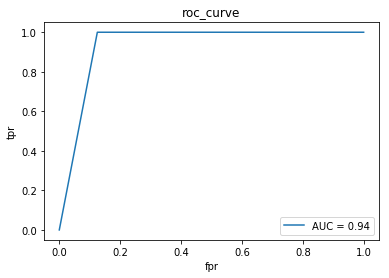

In [185]:
plt.plot(fpr,tpr,label='AUC = %0.2f' % roc_auc_DT)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc_curve")
plt.legend()

In [186]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [187]:
wml_credentials={
"access_key": "RWVUf6PMhFtWBgy86pjqji590_jahBPb8X-KIQ7uNEQp",
  "instance_id": "5571fc48-0a00-4138-804f-26a0a599bedb",
  "password": "93122f4a-4d26-4e73-9f66-27ec2987ebf6",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "ed8619de-5beb-466a-8d45-98396a15e3a4"
}

In [188]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [189]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Aiswariya",
            client.repository.ModelMetaNames.AUTHOR_EMAIL:"aiswariyasugavanam@gmail.com",
            client.repository.ModelMetaNames.NAME:"3dprinter"}

In [190]:
client.repository.list()

------------------------------------  -----------------  ------------------------  -----------------  -----------------
GUID                                  NAME               CREATED                   FRAMEWORK          TYPE
2c1954c6-a7c3-49ec-8a62-09a658d707d0  3dprinter          2019-06-27T06:29:59.565Z  scikit-learn-0.19  model
e455a491-737f-4278-8803-31c55885dbf6  3dprinter          2019-06-27T06:25:41.700Z  scikit-learn-0.19  model
e36b9ec9-0f76-486c-8026-91972a691d3d  3dprinter          2019-06-27T06:24:42.705Z  scikit-learn-0.19  model
d24db095-d875-4cfd-b5a1-2fc563ac76a4  3dprinter          2019-06-27T05:55:30.262Z  scikit-learn-0.19  model
5afcd677-2883-4f65-8714-bf9963330948  3dprinter          2019-06-27T05:34:43.740Z  scikit-learn-0.19  model
e39b18aa-814d-4faa-a513-8c7f64aa2059  3dprinter          2019-06-27T05:31:34.825Z  scikit-learn-0.19  model
a4b7c9e2-6a97-4caf-a876-fbedfa69d9cd  3dprinter          2019-06-27T05:30:13.499Z  scikit-learn-0.19  model
d22a18b6-5b40-481

In [191]:
model_s=client.repository.store_model(dt,meta_props=model_props)

In [192]:
published_model_uid=client.repository.get_model_uid(model_s)

In [193]:
published_model_uid

'99967a98-b3fd-46d2-b2ff-91b3f97397af'

In [194]:
d=client.deployments.create(published_model_uid,name="3dprinter")



#######################################################################################

Synchronous deployment creation for uid: '99967a98-b3fd-46d2-b2ff-91b3f97397af' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='02003366-eb43-4612-974c-329c9188c3bf'
------------------------------------------------------------------------------------------------




In [195]:
scoring_endpoint=client.deployments.get_scoring_url(d)

In [196]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/5571fc48-0a00-4138-804f-26a0a599bedb/deployments/02003366-eb43-4612-974c-329c9188c3bf/online'

In [197]:
client.deployments.list()

------------------------------------  -----------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME               TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
02003366-eb43-4612-974c-329c9188c3bf  3dprinter          online  DEPLOY_SUCCESS  2019-06-27T06:30:58.476Z  scikit-learn-0.19  model
8932609f-40bc-4ce5-bf8d-dd88e509ddbd  3dprinter          online  DEPLOY_SUCCESS  2019-06-27T06:25:43.888Z  scikit-learn-0.19  model
d1ca1bf5-7f52-400a-ac15-37684518f618  3dprinter          online  DEPLOY_SUCCESS  2019-06-27T05:55:32.061Z  scikit-learn-0.19  model
d0e8d43e-82a3-4cb7-97fe-e1a09ad4c45f  Social_prediction  online  DEPLOY_SUCCESS  2019-06-21T10:55:58.255Z  scikit-learn-0.19  model
4917c1ab-da20-4fb0-a668-e40e6b1b54d3  Profit_prediction  online  DEPLOY_SUCCESS  2019-06-21T10:52:22.349Z  scikit-learn-0.19  model
------------------------------------  -----------------  ---

In [198]:
client.deployments.delete('7f772379-38b9-4ba9-9fea-f2078ab71b6c')

{"trace":"f784af77eb99c21243278a89cd8a1595","errors":[{"code":"not_found","message":"Requested object could not be found."}]}


'FAILED'

In [199]:
dt.predict([[0.02,8,90,0,220,60,40,0,25,18,1.2]])

array([0])